# hw5

### 1,ISLP, chapter 5, conceptual exercise #2, parts a, b, c, d, e, f

#### (a)

Since each observation has the equal chance to be picked and with replacement, there are n observations, so P(being the jth observation)=$\frac{1}{n}$, then P(not being the jth observation)=$1-\frac{1}{n}$

#### (b)

P(being the jth observation)=$\frac{1}{n}$, then P(not being the jth observation)=$1-\frac{1}{n}$

#### (c)

since for all observation has the probability of not being the jth observation by $1-\frac{1}{n}$, and there are n observations we have P(jth observation not in bootstrap)=$(1-\frac{1}{n})^n$

#### (d)

P(jth observation in bootstrap)=$1-(\frac{4}{5})^5=\frac{2101}{3125}$

#### (e)

P(jth observation in bootstrap)=$1-(\frac{99}{100})^{100}=0.634$

#### (f)

P(jth observation in bootstrap)=$1-(\frac{9999}{10000})^{10000}=0.6321$

### 2, ISLP, chapter 5, conceptual exercise #4

Create a bootstrap. First of all, generte the sample by generating n size of datasets for B times with replacement, B should be large. Then for each datasets apply statistical learnig method to them, predict $\hat{Y_b}$ for each dataset, then $sd(\hat{Y})=\sqrt{\frac{1}{B-1}\sum_{b=1}^{B}(\hat{Y_b}-\bar{Y})^2}$

### 3

#### (a)

n=100, p=1 as there are only one predictor. $Y=X-2X^2+\epsilon$, X~ N(0,1), $\epsilon$ ~N(0,1)

#### (b)

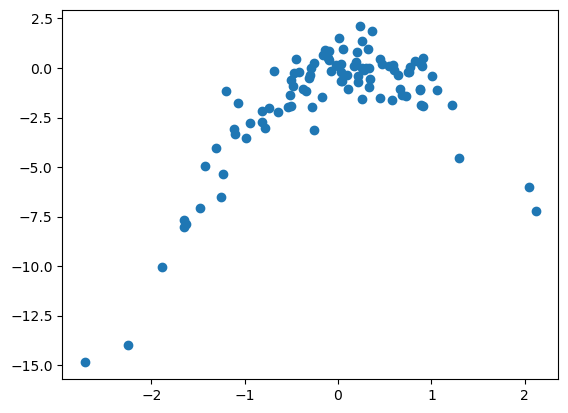

In [310]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)
plt.scatter(x,y)
plt.show()

There exists a quadratic distribution with inverted U-shape.

#### (c)

In [314]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
X = x.reshape(-1, 1)
degrees = [1, 2, 3, 4]
cv_errors = {deg: [] for deg in degrees}
kf = KFold(n_splits=5, shuffle=True, random_state=3)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    for deg in degrees:
        poly = PolynomialFeatures(degree=deg)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        model = LinearRegression()
        model.fit(X_train_poly, Y_train)
        Y_pred = model.predict(X_test_poly)
        mse = mean_squared_error(Y_test, Y_pred)
        cv_errors[deg].append(mse)
for deg in degrees:
    print(f"Degree {deg}: Mean CV Error = {np.mean(cv_errors[deg]):.4f} (Std: {np.std(cv_errors[deg]):.4f})")
best_degree = min(cv_errors, key=lambda d: np.mean(cv_errors[d]))
print(f"\nModel with the lowest average MSE: Degree {best_degree}")

Degree 1: Mean CV Error = 6.3903 (Std: 1.4336)
Degree 2: Mean CV Error = 1.1291 (Std: 0.5494)
Degree 3: Mean CV Error = 1.2483 (Std: 0.7009)
Degree 4: Mean CV Error = 1.3692 (Std: 0.9668)

Model with the lowest average MSE: Degree 2


model with degree has the smallest error, it's as expected since the original model is quadraic.

### 4

False, since in LOOCV in each fold each observation will be excluded for one turn and included in all other turn one by one, regardless of which observation is excluded in which turn the result is destined and can't be random, so it doesn't depend on the random seed.

### 5

#### (a)

In [321]:
import pandas as pd
boston=pd.read_csv("C:\\Users\\DELL\\Downloads\\boston.csv")
muhat=np.mean(boston["medv"])
muhat

22.532806324110677

#### (b)

In [324]:
sdhat=np.std(boston["medv"])
errorhat=sdhat/np.sqrt(len(boston))
print(errorhat)

0.4084569346972867


the standard error is 0.4085, which is much smaller than sample mean, indicating that the sample mean is stable and accurate.

#### (c)

In [328]:
np.random.seed(1) 
B = 1000  
bootstrap_means = []
for _ in range(B):
    resample = np.random.choice(boston["medv"], size=len(boston["medv"]), replace=True) 
    bootstrap_means.append(np.mean(resample))
se_bootstrap = np.std(bootstrap_means, ddof=1)  
print(f"Bootstrap SE of µ̂: {se_bootstrap:.4f}")

Bootstrap SE of µ̂: 0.4126


The standard error by bootstrap is a little larger then the standard error in (b), indicating more variability than assumed

#### (d)

In [332]:
lowerci1=muhat-2*se_bootstrap
upperci1=muhat+2*se_bootstrap
lowerci2=muhat-2*errorhat
upperci2=muhat+2*errorhat
print("%95ci using bootstrap:[",lowerci1,",",upperci1,"]")
print("%95ci not using bootstrap:[",lowerci2,",",upperci2,"]")

%95ci using bootstrap:[ 21.707588209305666 , 23.358024438915688 ]
%95ci not using bootstrap:[ 21.715892454716105 , 23.34972019350525 ]


From the result it seems that the 95% CI covers more using bootstrap method than that using calculation method, but the results are actually similar.

#### (e)

In [336]:
muhatmedian=np.median(boston["medv"])
muhatmedian

21.2

#### (f)

In [339]:
np.random.seed(1)
B=1000
bootstrap_medians = np.array([
    np.median(np.random.choice(boston['medv'], size=len(boston["medv"]), replace=True)) for _ in range(B)
])
se_bootstrap = np.std(bootstrap_medians, ddof=1)  
print(f"Bootstrap SE of µ̂: {se_bootstrap:.4f}")

Bootstrap SE of µ̂: 0.3748


#### (g)

In [342]:
np.percentile(boston["medv"],10)

12.75

#### (h)

In [345]:
np.random.seed(1)
B=1000
bootstrap_percentiles = np.array([
    np.percentile(np.random.choice(boston['medv'], size=len(boston), replace=True), 10) for _ in range(B)
])
se_bootstrap = np.std(bootstrap_percentiles, ddof=1)  
print(f"Bootstrap SE of µ̂: {se_bootstrap:.4f}")

Bootstrap SE of µ̂: 0.4886


This standard error for 10% percentile is similar that of whole data

### 6

#### (a)

In [350]:
import statsmodels.api as sm
weekly=pd.read_csv("C:\\Users\\DELL\\Downloads\\Weekly.csv")
X=weekly.loc[:,["Lag1","Lag2"]]
weekly["Direction"]=weekly["Direction"].map({"Up":1,"Down":0})
y=weekly["Direction"]
X = sm.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.683297
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1086
Method:                           MLE   Df Model:                            2
Date:                Sun, 23 Feb 2025   Pseudo R-squ.:                0.005335
Time:                        19:45:48   Log-Likelihood:                -744.11
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                   0.01848
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2212      0.061      3.599      0.000       0.101       0.342
Lag1          -0.0387      0.026     -1.477      0.140      -0.090       0.013
Lag2           0.0602      0.027      2.270      0.023       0.008       0.112
==============================================================================
"""

From the result it seema that lag1 doesn't have significant influence on direction, the odds increase 2.74% for every increase of lag2.

#### (b)

In [354]:
X=weekly.loc[1:len(weekly)-1,["Lag1","Lag2"]]
y=weekly.loc[1:len(weekly)-1:,["Direction"]]
X = sm.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.683147
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1088
Model:                          Logit   Df Residuals:                     1085
Method:                           MLE   Df Model:                            2
Date:                Sun, 23 Feb 2025   Pseudo R-squ.:                0.005387
Time:                        19:45:48   Log-Likelihood:                -743.26
converged:                       True   LL-Null:                       -747.29
Covariance Type:            nonrobust   LLR p-value:                   0.01785
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2232      0.061      3.630      0.000       0.103       0.344
Lag1          -0.0384      0.026     -1.466      0.143      -0.090       0.013
Lag2           0.0608      0.027      2.291      0.022       0.009       0.113
==============================================================================
"""

The result is actually quite similar to that of (a), lag1 doesn't have significant influence on direction, the odds increase 2.74% for every increase of lag2.

#### (c)

In [358]:
X_test = weekly.loc[[0], ["Lag1", "Lag2"]]
X_test["constant"]=1
X_test = X_test[["constant", "Lag1", "Lag2"]]
predicted_prob = result.predict(X_test)
predicted_class = 1 if predicted_prob.iloc[0] > 0.5 else 0
print (predicted_class)
weekly.head(1)

1


,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.27,0


It's not correctly classified

#### (d)

##### i

In [363]:
n=len(weekly)
for i in range (n):
    X_train = weekly.drop(i)[["Lag1", "Lag2"]]
    y_train = weekly.drop(i)["Direction"]
    X_train["const"] = 1
    logit_model = sm.Logit(y_train, X_train)
    result = logit_model.fit(disp=False) 

##### ii

In [365]:
for i in range(n):
    X_train = weekly.drop(i)[["Lag1", "Lag2"]]
    y_train = weekly.drop(i)["Direction"]
    X_train["const"] = 1
    logit_model = sm.Logit(y_train, X_train)
    result = logit_model.fit(disp=False) 
    X_test = weekly.loc[[i], ["Lag1", "Lag2"]] 
    X_test["const"] = 1 
    predicted_prob = result.predict(X_test)
    predicted_class = 1 if predicted_prob.iloc[0] > 0.5 else 0

##### iii

In [369]:
errors=[]
for i in range(n):
    X_train = weekly.drop(i)[["Lag1", "Lag2"]]
    y_train = weekly.drop(i)["Direction"]
    X_train["const"] = 1
    logit_model = sm.Logit(y_train, X_train)
    result = logit_model.fit(disp=False) 
    X_test = weekly.loc[[i], ["Lag1", "Lag2"]] 
    X_test["const"] = 1  
    predicted_prob = result.predict(X_test)
    predicted_class = 1 if predicted_prob.iloc[0] > 0.5 else 0
    actual_class = weekly.loc[i, "Direction"]
    error = 1 if predicted_class != actual_class else 0
    errors.append(error)
loocv_error_rate = sum(errors) / n
print(f"LOOCV Error Rate: {loocv_error_rate}")

LOOCV Error Rate: 0.44995408631772266


#### (e)

That means the error rate of LOOCV method is 0.45, which is close to 50%, indicating that this method may not be very suitable.

In [288]:
!jupyter nbconvert --to html stats_503_hw5.ipynb

[NbConvertApp] Converting notebook stats_503_hw5.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 370266 bytes to stats_503_hw5.html
